# Etude du domaine de validité du modèle

In [1]:
%load_ext autoreload
%autoreload 2

import warnings
import pandas as pd
from sklearn import set_config

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 5000)
pd.set_option("display.max_rows", 101)
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))

set_config(transform_output="pandas")

In [2]:
from sklearn.neighbors import LocalOutlierFactor
from utils import RANDOM_STATE, TARGET


X = pd.read_csv("./data/kaggle_train_set.csv")

# Ne gardons que les régions et les années de construction présentes dans le test set
test = pd.read_csv("./data/kaggle_test_set.csv")

X = X[X.Neighborhood.isin(test.Neighborhood.unique())]
# X = X[X.YearBuilt.isin(test.YearBuilt)]

# Supprimons les outliers
keep_columns = ['GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'GarageArea']

lof = LocalOutlierFactor(contamination=0.03)
outliers_prediction = lof.fit_predict(X.loc[:, keep_columns])

mask_non_outliers = outliers_prediction == 1
X = X[mask_non_outliers]
y = X.pop(TARGET)

print(f"\nLa shape de X est {X.shape}")
print(f"La shape de y est {y.shape}")


La shape de X est (1142, 15)
La shape de y est (1142,)


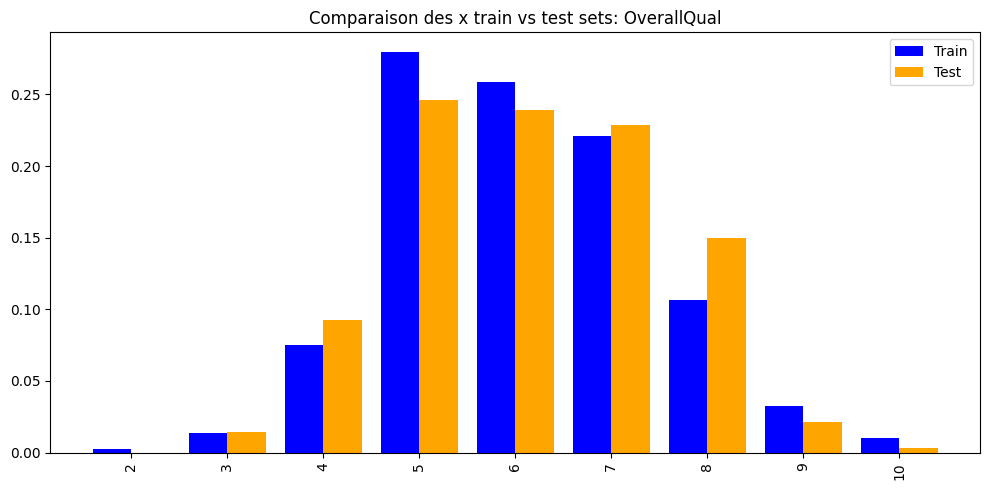

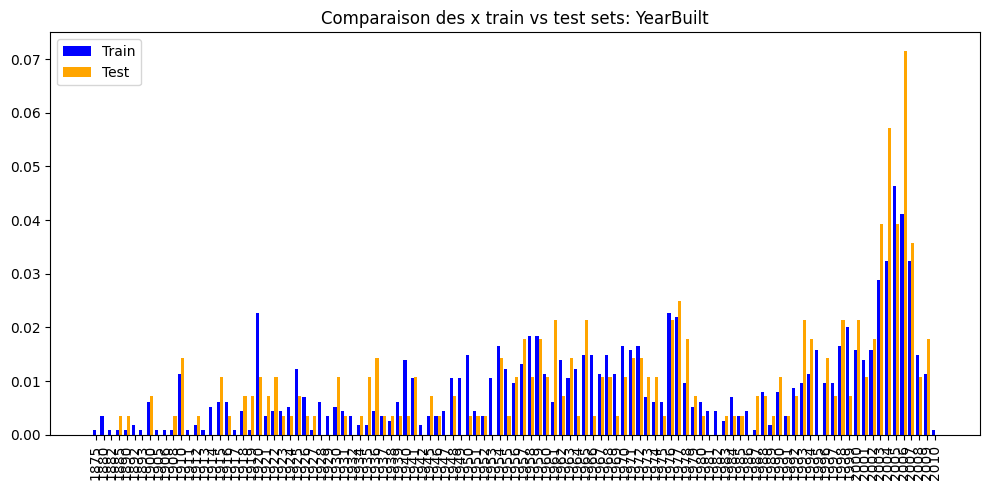

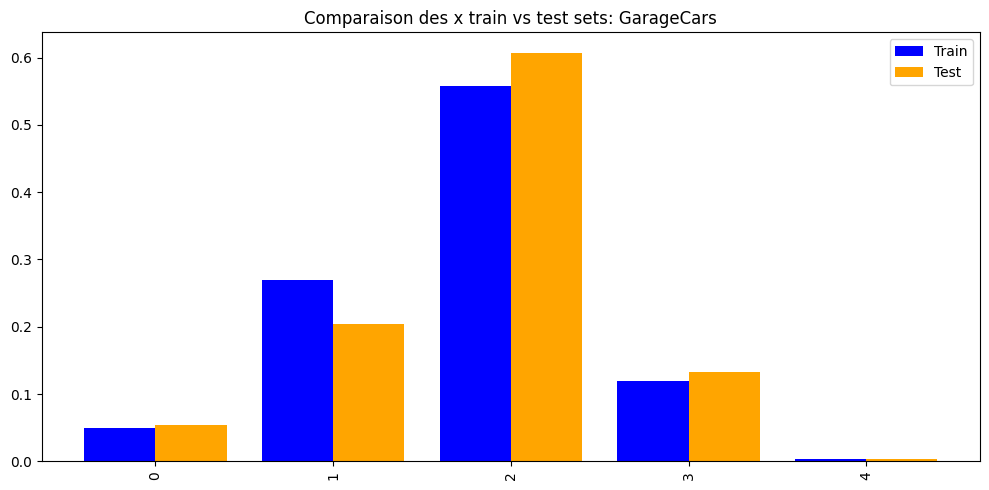

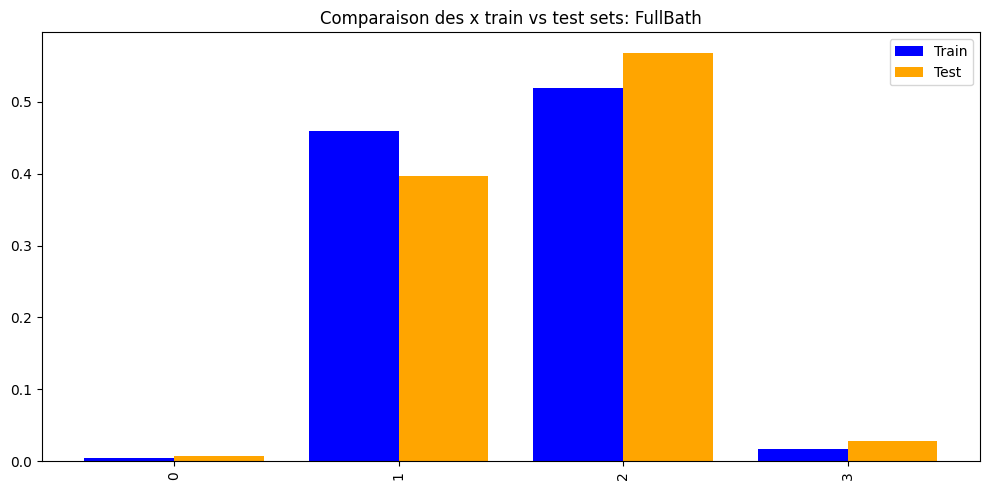

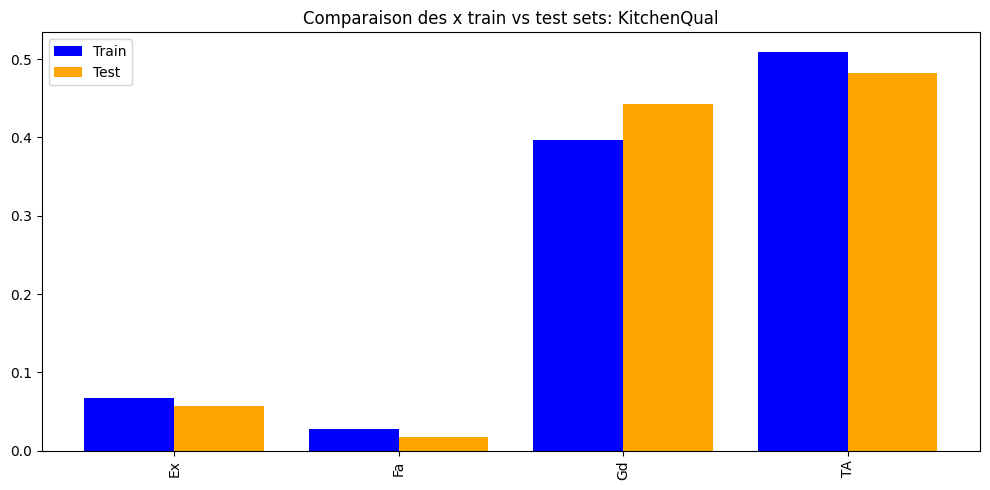

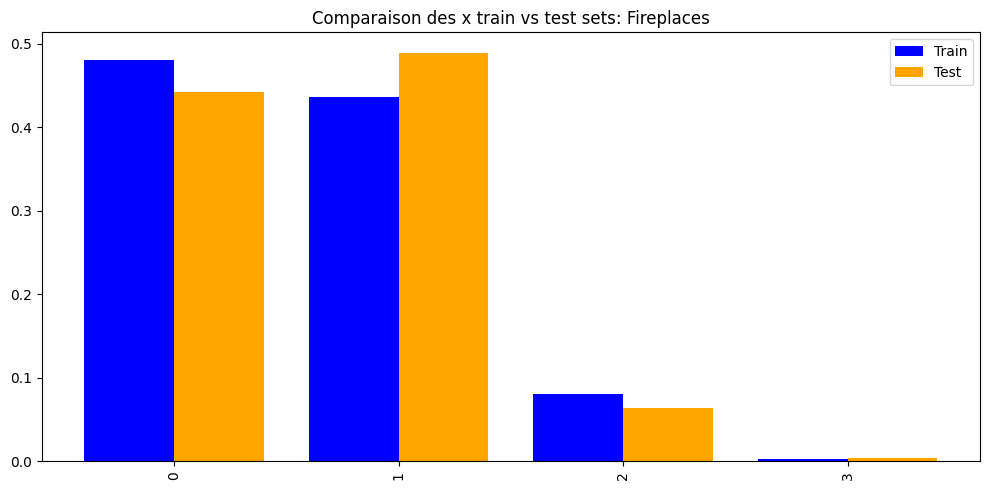

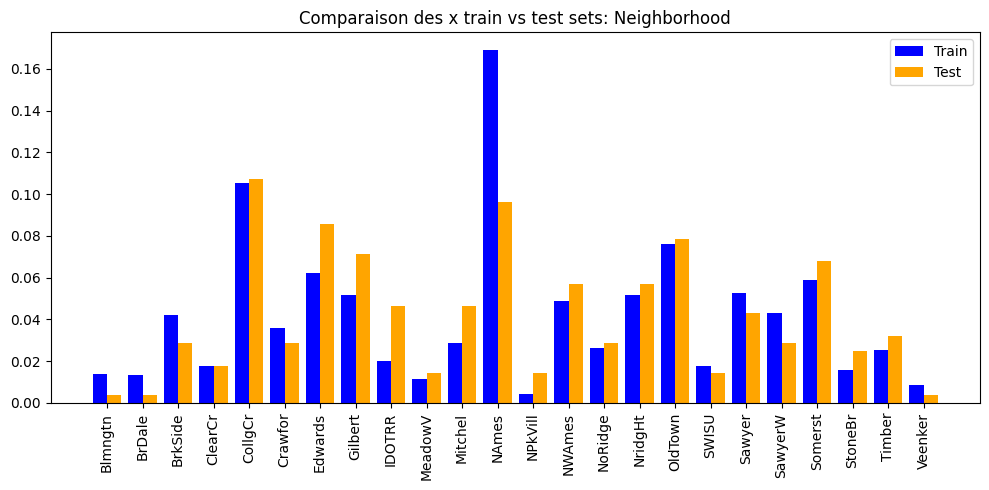

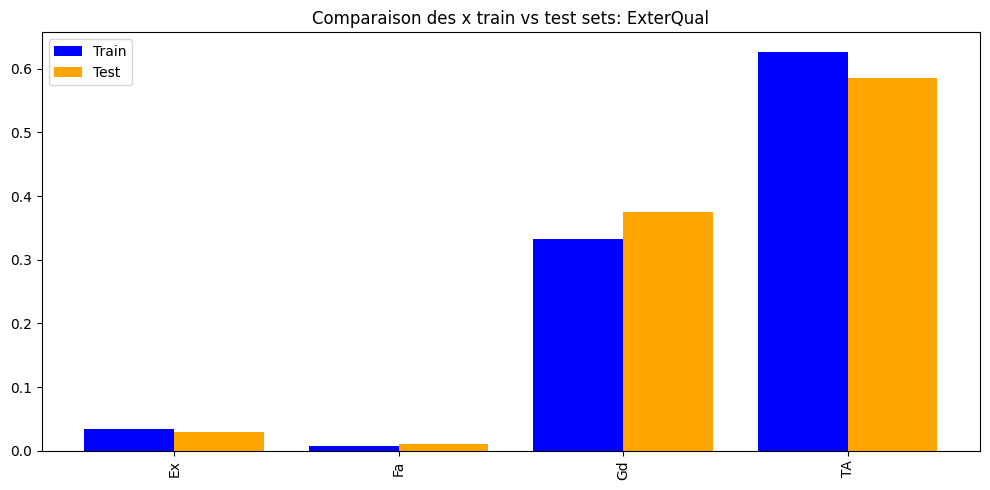

In [3]:
from matplotlib import pyplot as plt


columns = 'OverallQual', 'YearBuilt', 'GarageCars', 'FullBath', 'KitchenQual', 'Fireplaces', 'Neighborhood', 'ExterQual'

for column in columns:
    fig, ax = plt.subplots(figsize=(10, 5))
    # Deuxième graphique : Comparaison des distributions entre train et test
    train_counts = X[column].value_counts(normalize=True).sort_index()
    test_counts = test[column].value_counts(normalize=True).sort_index()

    categories = train_counts.index
    x = range(len(categories))
    width = 0.4

    ax.bar([i - width/2 for i in x], train_counts.values, width=width, label='Train', color='blue')
    ax.bar([i + width/2 for i in x], test_counts.reindex(categories, fill_value=0).values, width=width, label='Test', color='orange')
    ax.set_xticks(x)
    ax.set_xticklabels(categories, rotation=90)
    ax.set_title(f"Comparaison des x train vs test sets: {column}")
    ax.legend()

    plt.tight_layout()
    plt.show()

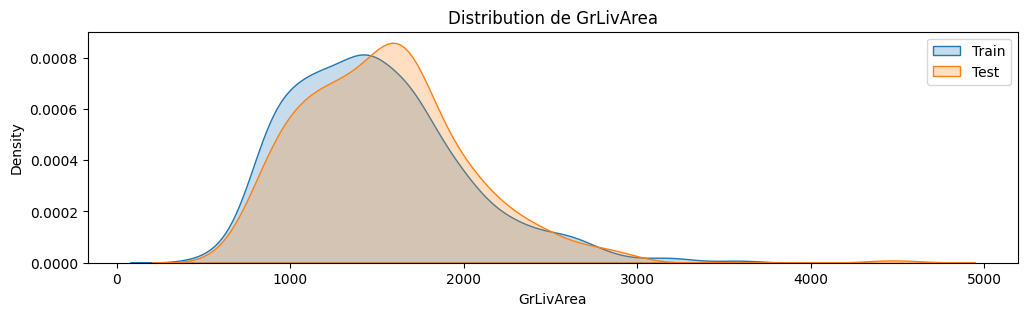

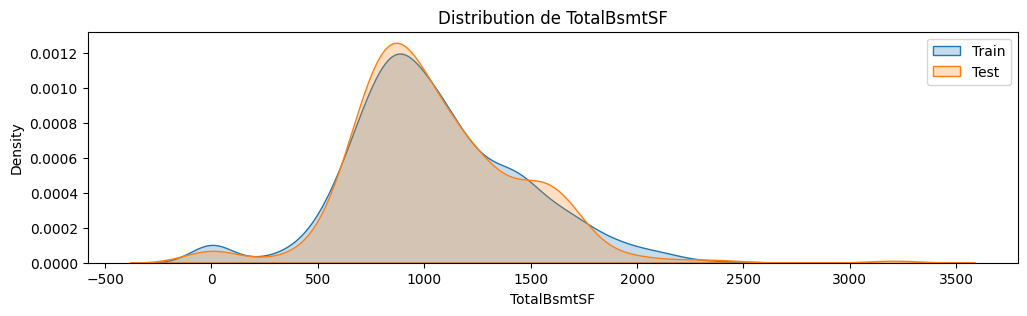

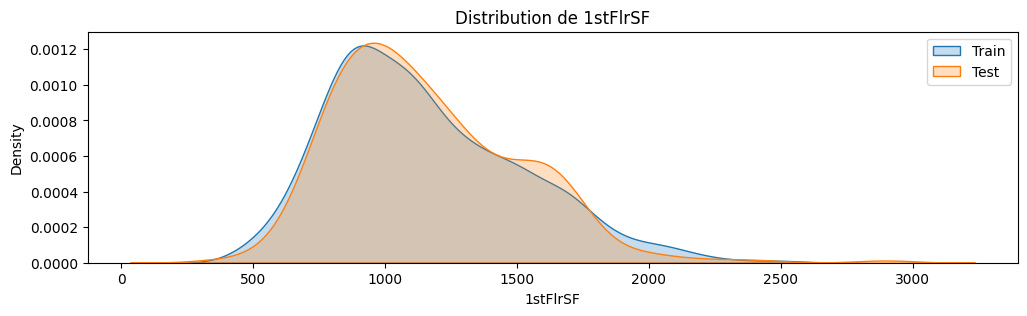

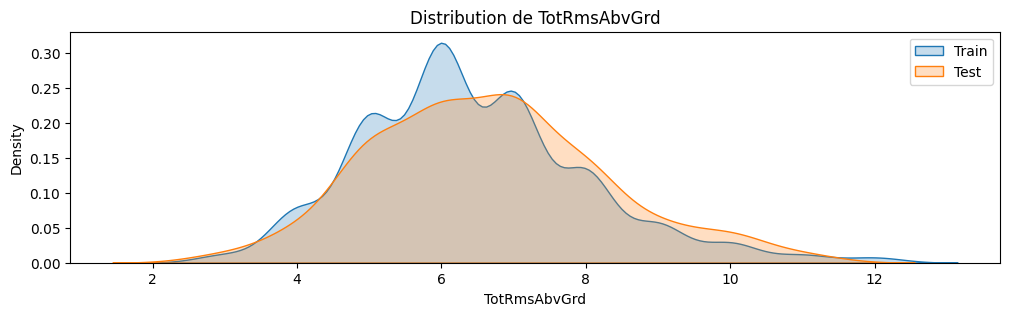

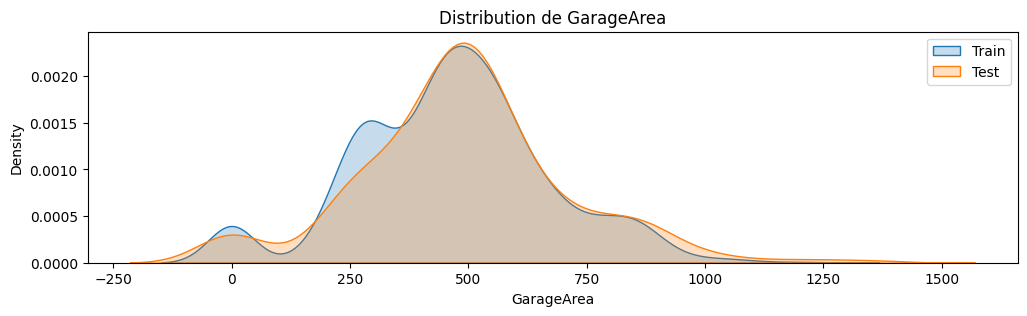

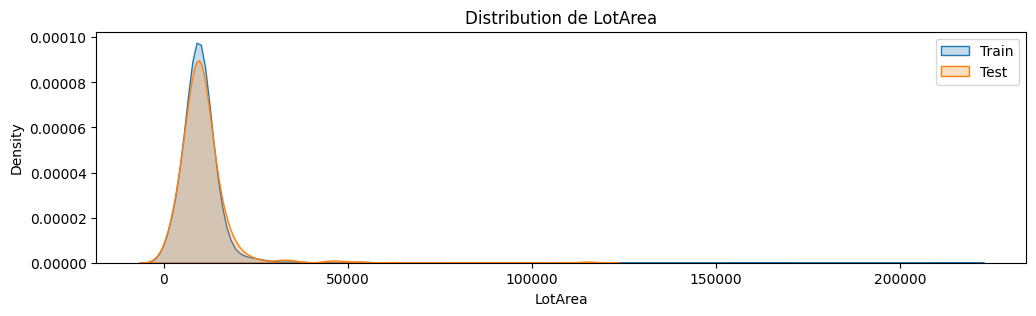

In [4]:
import seaborn as sns

columns = 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'TotRmsAbvGrd', 'GarageArea', 'LotArea'
# Visualisation des distributions
for column in columns:
    plt.figure(figsize=(12, 3))
    sns.kdeplot(X[column], label='Train', shade=True)
    sns.kdeplot(test[column], label='Test', shade=True)
    plt.title(f"Distribution de {column}")
    plt.legend()
    plt.show()